In [1]:
import pymysql.cursors
import pandas
import matplotlib.pyplot as plt
import numpy as np
import random
import pandas as pd
import datetime
plt.style.use("fivethirtyeight")
# %matplotlib notebook
%matplotlib inline


my_file_name = "..\\DATA\\center_sternum.txt"
df_stern_data = pd.read_csv(my_file_name, encoding="ANSI", sep="\t")
df_stern_data

,Log Mode,Log Freq,Timestamp,AccX,AccY,AccZ,GyroX,GyroY,GyroZ,MagnX,MagnY,MagnZ,qw,qi,qj,qk
0,5,200,1576222772,947.086,435.662,70.638,-6.824428,-14.244280,1.404580,-454,-490,-178,0.792622,0.254952,-0.553850,-0.000031
1,5,200,1576222772,969.168,387.777,88.877,6.183206,-12.290080,-7.969466,-454,-490,-177,0.736461,0.275124,-0.617969,0.006806
2,5,200,1576222772,989.603,380.335,78.751,11.709920,-4.961832,-7.450382,-454,-490,-177,0.729465,0.275246,-0.626118,0.009827
3,5,200,1576222772,954.894,418.033,88.328,17.877860,2.519084,-5.984733,-454,-492,-176,0.723413,0.277200,-0.632221,0.011383
4,5,200,1576222772,972.096,427.732,99.857,25.221370,5.404580,4.015267,-454,-492,-176,0.721948,0.280007,-0.632679,0.010193
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16501,5,200,1576222847,958.493,291.092,-54.290,1.664122,2.305344,-0.671756,-494,-449,-126,0.650810,0.379162,-0.636402,0.166356
16502,5,200,1576222847,954.650,288.042,-49.654,1.480916,2.488550,-0.702290,-494,-450,-125,0.650239,0.379803,-0.636708,0.165960
16503,5,200,1576222847,967.338,290.482,-63.867,1.114504,3.374046,-0.900763,-494,-450,-125,0.649365,0.380627,-0.637227,0.165502
16504,5,200,1576222847,965.630,300.852,-56.242,0.702290,3.664122,-1.587786,-495,-448,-124,0.648973,0.381329,-0.637348,0.164953


In [2]:

delta_time = 1/200
current_time = 0
times = []
for index in range(len(df_stern_data)):
    times.append(current_time)
    current_time += delta_time
#print(times)
df_stern_data["time"] = times
#print(df_stern_data)
df_stern_data.time = df_stern_data.time.astype(float).round(4)
print(df_stern_data)

       Log Mode  Log Freq   Timestamp     AccX     AccY    AccZ      GyroX  \
0             5       200  1576222772  947.086  435.662  70.638  -6.824428   
1             5       200  1576222772  969.168  387.777  88.877   6.183206   
2             5       200  1576222772  989.603  380.335  78.751  11.709920   
3             5       200  1576222772  954.894  418.033  88.328  17.877860   
4             5       200  1576222772  972.096  427.732  99.857  25.221370   
...         ...       ...         ...      ...      ...     ...        ...   
16501         5       200  1576222847  958.493  291.092 -54.290   1.664122   
16502         5       200  1576222847  954.650  288.042 -49.654   1.480916   
16503         5       200  1576222847  967.338  290.482 -63.867   1.114504   
16504         5       200  1576222847  965.630  300.852 -56.242   0.702290   
16505         5       200  1576222847  959.957  298.473 -55.998   0.290076   

           GyroY     GyroZ  MagnX  MagnY  MagnZ        qw      

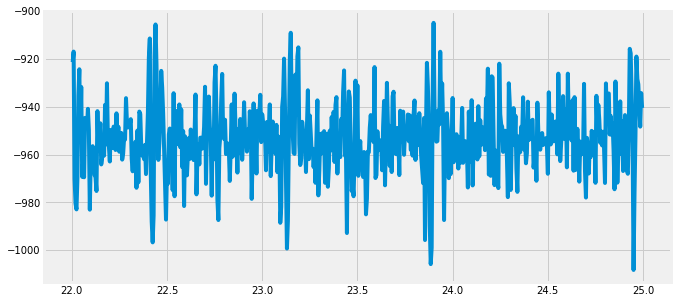

In [3]:
df_clean_stern_data = df_stern_data[(df_stern_data.time > 22) & (df_stern_data.time < 25)]
fig = plt.figure(figsize=(10,5))
plt.plot(df_clean_stern_data["time"],df_clean_stern_data["AccZ"])

plt.show()



In [4]:
from scipy.signal import butter, filtfilt

In [6]:
!pip install scipy

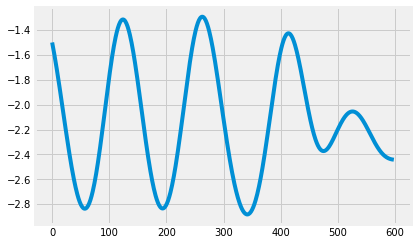

In [9]:
b, a = butter(4,2,"lowpass",fs=200)
result =filtfilt(b,a,df_clean_stern_data['GyroX'])

plt.plot(result)

In [ ]:
for index in 

In [ ]:
#introduzione: dire il perchè serve, smentire i dibattiti che ci sono in merito all'argomento, citare fonti e mettere il link a fine pagina
#risultati : hr hrv 
#conclusioni : ciò che ci sarebbe da fare per migliorare il lavoro